心得:在這次的作業，我大致了解了值方圖等化的原理，和等化後的結果。其中我最有印象的是最後一題，因為我最一開始自己累加灰階值數量，再存到陣列，不過後續遇到不少問題，但後來上網看到numpy有cumsum的語法，以及值方圖等化在影像處理的公式，其中公式就要使用到cdf(累積分布函數)，剛好在機率論有提到過，我也深深感受到數學的重要性。

In [ ]:
def plot_img_and_hist(image, axes, bins=256):#bins表示長條個數
    """Plot an image along with its histogram and cumulative histogram.

    """
    ax_img, ax_hist = axes#一個軸是影像一個是直方圖
    ax_cdf = ax_hist.twinx()#Create a new Axes with an invisible x-axis and an independent y-axis positioned opposite to the original one

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins)#hist用於繪製直方圖,ravel change image to 1D array
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')

    xmin, xmax = dtype_range[image.dtype.type]
    ax_hist.set_xlim(xmin, xmax)#set x-axis's limit

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)#計算累積分布函數
    ax_cdf.plot(bins, img_cdf, 'r')#bins correspond to x axis,img_cdf to y

    return ax_img, ax_hist, ax_cdf

使用scikit-image完成全域、局部直方圖等化

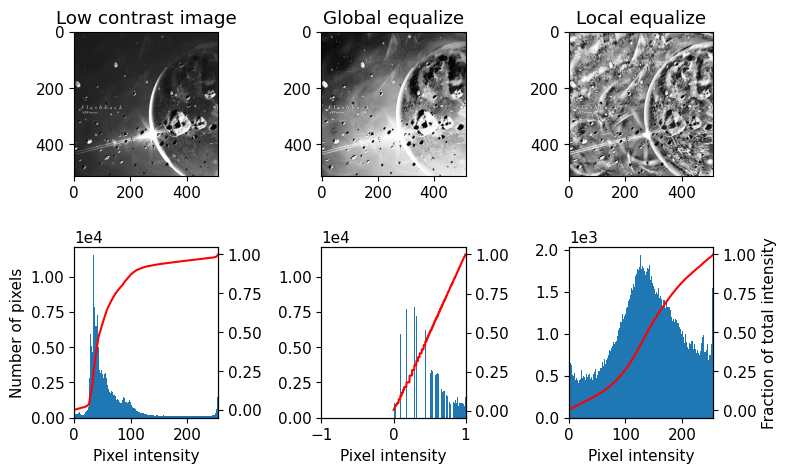

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import io
from skimage import data
from skimage.util.dtype import dtype_range
from skimage.util import img_as_ubyte
from skimage import exposure
from skimage.morphology import disk
from skimage.filters import rank

matplotlib.rcParams['font.size'] = 11

# Load an example image
img = io.imread("hw4-1.jpg")
img = img_as_ubyte(rgb2gray(img))#Convert an image to unsigned byte format, with values in [0, 255].
#img = img_as_ubyte(data.moon())
# Global equalize
img_rescale = exposure.equalize_hist(img)#回傳值方圖等化後的結果

# Equalization
selem = disk(30)#The radius of the disk-shaped footprint
img_eq = rank.equalize(img, selem)#Equalize image using local histogram(直方圖).
# Display results
fig = plt.figure(figsize=(8, 5))#width=8 height=5
axes = np.zeros((2, 3), dtype=object)#原本有bug，np.obeject是已經棄用的alias,用object
axes[0, 0] = plt.subplot(2, 3, 1)#2 row * 3 col,the first picture
axes[0, 1] = plt.subplot(2, 3, 2, sharex=axes[0, 0], sharey=axes[0, 0])
axes[0, 2] = plt.subplot(2, 3, 3, sharex=axes[0, 0], sharey=axes[0, 0])
axes[1, 0] = plt.subplot(2, 3, 4)
axes[1, 1] = plt.subplot(2, 3, 5)
axes[1, 2] = plt.subplot(2, 3, 6)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])#axes[:, 0]=[0,0][1,0]
ax_img.set_title('Low contrast image')
ax_hist.set_ylabel('Number of pixels')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Global equalize')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Local equalize')
ax_cdf.set_ylabel('Fraction of total intensity')

# prevent overlap of y-axis labels
fig.tight_layout()

修改局部直方圖等化的參數，找出最佳的結果

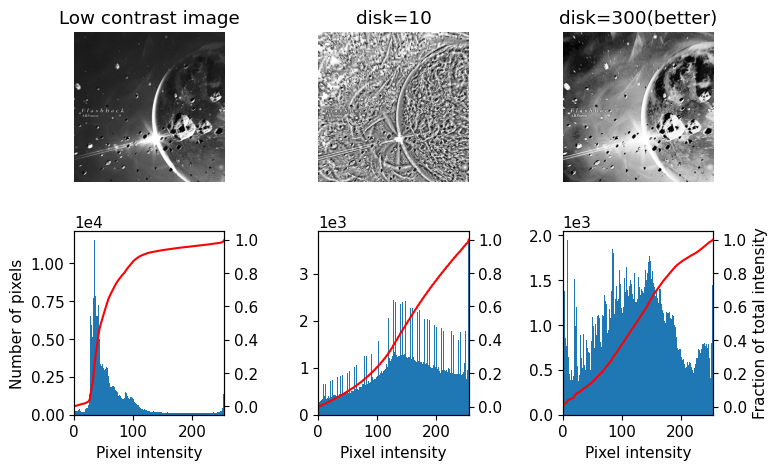

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import io
from skimage import data
from skimage.util.dtype import dtype_range
from skimage.util import img_as_ubyte
from skimage import exposure
from skimage.morphology import disk
from skimage.filters import rank

matplotlib.rcParams['font.size'] = 11

# Load an example image
img = io.imread("hw4-1.jpg")
img = img_as_ubyte(rgb2gray(img))#Convert an image to unsigned byte format, with values in [0, 255].
#img = img_as_ubyte(data.moon())
# Global equalize
img_rescale = exposure.equalize_hist(img)#回傳值方圖等化後的結果

# Equalization
selem = disk(10)#修改局部直方圖等化的參數
img_eq = rank.equalize(img, selem)#Equalize image using local histogram(直方圖).
# Display results
fig = plt.figure(figsize=(8, 5))#width=8 height=5
axes = np.zeros((2, 3), dtype=object)#原本有bug，np.obeject是已經棄用的alias,用object
axes[0, 0] = plt.subplot(2, 3, 1)#2 row * 3 col,the first picture
axes[0, 1] = plt.subplot(2, 3, 2, sharex=axes[0, 0], sharey=axes[0, 0])
axes[0, 2] = plt.subplot(2, 3, 3, sharex=axes[0, 0], sharey=axes[0, 0])
axes[1, 0] = plt.subplot(2, 3, 4)
axes[1, 1] = plt.subplot(2, 3, 5)
axes[1, 2] = plt.subplot(2, 3, 6)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])#axes[:, 0]=[0,0][1,0]
ax_img.set_title('Low contrast image')
ax_hist.set_ylabel('Number of pixels')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 1])
ax_img.set_title('disk=10')

selem = disk(300)#修改局部直方圖等化的參數
img_eq = rank.equalize(img, selem)#Equalize image using local histogram(直方圖).

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('disk=300(better)')
ax_cdf.set_ylabel('Fraction of total intensity')

# prevent overlap of y-axis labels
fig.tight_layout()

不使用scikit-image完成全域值方圖等化

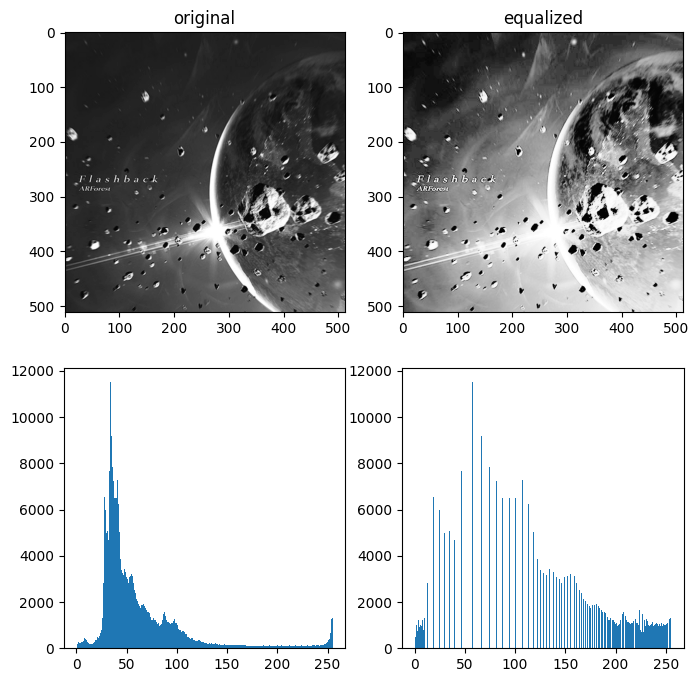

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image,ImageOps

def global_equalize(img):
  final=np.zeros_like(img)
  pixelcount=np.zeros(256,dtype=np.uint)
  total_gray=0
  for pixel in img.ravel():   #ravel轉換成1D array
    pixelcount[pixel]+=1     #count correspond pixel's amount
  cdf=np.cumsum(pixelcount)     #Return the cumulative sum
  #print(cdf)
  min_cdf=min(cdf)
  total_pixel=img.size       #equal to width*size
  for i in range(len(cdf)):
    final[img==i] = round((cdf[i]-min_cdf)/(total_pixel-min_cdf) * 255)
  final=final.reshape(img.shape)#change from 1D array to 2D array
  return final

img=Image.open('hw4-1.jpg').convert('L')
img=np.array(img)
equalized_img=global_equalize(img)
fig, axes = plt.subplots(2, 2, figsize=(8,8))
axes[0,0].imshow(img,cmap='gray')
axes[0,0].set_title('original')

axes[0,1].imshow(equalized_img,cmap='gray')
axes[0,1].set_title('equalized')

axes[1,0].hist(img.ravel(),bins=256)#show histogram,remember to use.ravel()
axes[1,1].hist(equalized_img.ravel(),bins=256)

plt.show()

general equalize formula

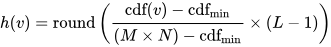

reference:https://stackoverflow.com/questions/58433683/histogram-equalization-not-getting-required-output-image

https://en.wikipedia.org/wiki/Histogram_equalization#Implementation